# Importing Library

In [1]:
import pandas as pd

# Data Understanding

# loading the data

In [2]:
data = pd.read_csv("C:\\Users\\Vipul Khachane\\Documents\\Data\\bitcoin_2017_to_2023.csv",encoding='latin1')

# Display the first few rows

In [3]:
print(data.head())

             timestamp      open      high       low     close    volume  \
0  2023-08-01 13:19:00  28902.48  28902.49  28902.48  28902.49   4.68658   
1  2023-08-01 13:18:00  28902.48  28902.49  28902.48  28902.49   4.77589   
2  2023-08-01 13:17:00  28908.52  28908.53  28902.48  28902.49  11.52263   
3  2023-08-01 13:16:00  28907.41  28912.74  28907.41  28908.53  15.89610   
4  2023-08-01 13:15:00  28896.00  28907.42  28893.03  28907.41  37.74657   

   quote_asset_volume  number_of_trades  taker_buy_base_asset_volume  \
0        1.354538e+05               258                      0.89391   
1        1.380351e+05               317                      2.24546   
2        3.330532e+05               451                      2.70873   
3        4.595556e+05               483                     10.22981   
4        1.090761e+06               686                     16.50452   

   taker_buy_quote_asset_volume  
0                  25836.224836  
1                  64899.385195  
2       

# Check data types

In [4]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3126000 entries, 0 to 3125999
Data columns (total 10 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   timestamp                     object 
 1   open                          float64
 2   high                          float64
 3   low                           float64
 4   close                         float64
 5   volume                        float64
 6   quote_asset_volume            float64
 7   number_of_trades              int64  
 8   taker_buy_base_asset_volume   float64
 9   taker_buy_quote_asset_volume  float64
dtypes: float64(8), int64(1), object(1)
memory usage: 238.5+ MB
None


# Summary statistics

In [5]:
print(data.describe())

               open          high           low         close        volume  \
count  3.126000e+06  3.126000e+06  3.126000e+06  3.126000e+06  3.126000e+06   
mean   2.008947e+04  2.010217e+04  2.007666e+04  2.008946e+04  5.290800e+01   
std    1.605896e+04  1.606926e+04  1.604871e+04  1.605896e+04  9.774388e+01   
min    2.830000e+03  2.830000e+03  2.817000e+03  2.817000e+03  0.000000e+00   
25%    7.624747e+03  7.629600e+03  7.620000e+03  7.624798e+03  1.120167e+01   
50%    1.169999e+04  1.170681e+04  1.169249e+04  1.170000e+04  2.387539e+01   
75%    2.989957e+04  2.990724e+04  2.989051e+04  2.989957e+04  5.393630e+01   
max    6.900000e+04  6.900000e+04  6.878670e+04  6.900000e+04  5.877775e+03   

       quote_asset_volume  number_of_trades  taker_buy_base_asset_volume  \
count        3.126000e+06      3.126000e+06                 3.126000e+06   
mean         1.155882e+06      1.018583e+03                 2.632231e+01   
std          2.335868e+06      1.817813e+03                 

# Check for Missing Values:

In [6]:
print(data.isnull().sum())

timestamp                       0
open                            0
high                            0
low                             0
close                           0
volume                          0
quote_asset_volume              0
number_of_trades                0
taker_buy_base_asset_volume     0
taker_buy_quote_asset_volume    0
dtype: int64


# Preprocess the Data

In [ ]:
# Convert Timestamps

In [7]:
data['timestamp'] = pd.to_datetime(data['timestamp'], errors='coerce')

In [ ]:
# Sort Data Chronologically

In [8]:
data.sort_values(by='timestamp', inplace=True)

# Define the Ascending Triangle Pattern

In [ ]:
# Key Characteristics of an Ascending Triangle:
            Upper Trendline: Flat or horizontal line formed by the highs.
            Lower Trendline: Rising line formed by the lows.

# Implement the Pattern Detection Algorithm

In [9]:
def detect_ascending_triangle(data, window=20, tolerance=0.02):
    triangles = []
    for i in range(window, len(data) - window):
        highs = data['high'][i - window:i].values
        lows = data['low'][i - window:i].values
        
        max_high = max(highs)
        min_high = min(highs)
        
        if (max_high - min_high) / max_high < tolerance:
            is_upward = all(lows[j] < lows[j + 1] for j in range(len(lows) - 1))
            if is_upward:
                triangles.append((data['timestamp'][i - window], data['timestamp'][i]))
    
    return triangles

# Detect Patterns:

In [10]:
detected_patterns = detect_ascending_triangle(data)
count = len(detected_patterns)
print(f'Total Ascending Triangle Patterns Detected: {count}')
for start, end in detected_patterns:
    print(f'Start: {start}, End: {end}')

Total Ascending Triangle Patterns Detected: 54
Start: 2023-07-07 12:22:00, End: 2023-07-07 12:02:00
Start: 2023-07-07 12:21:00, End: 2023-07-07 12:01:00
Start: 2023-07-07 12:20:00, End: 2023-07-07 12:00:00
Start: 2023-07-07 12:19:00, End: 2023-07-07 11:59:00
Start: 2023-07-07 12:18:00, End: 2023-07-07 11:58:00
Start: 2023-05-16 04:17:00, End: 2023-05-16 03:57:00
Start: 2023-05-16 04:16:00, End: 2023-05-16 03:56:00
Start: 2023-04-17 07:07:00, End: 2023-04-17 06:47:00
Start: 2023-04-15 19:51:00, End: 2023-04-15 19:31:00
Start: 2023-04-15 19:50:00, End: 2023-04-15 19:30:00
Start: 2023-04-15 19:49:00, End: 2023-04-15 19:29:00
Start: 2023-04-15 19:48:00, End: 2023-04-15 19:28:00
Start: 2023-04-15 19:47:00, End: 2023-04-15 19:27:00
Start: 2023-04-15 19:46:00, End: 2023-04-15 19:26:00
Start: 2023-04-14 01:23:00, End: 2023-04-14 01:03:00
Start: 2023-04-02 05:23:00, End: 2023-04-02 05:03:00
Start: 2023-04-02 05:21:00, End: 2023-04-02 05:01:00
Start: 2022-08-30 20:32:00, End: 2022-08-30 20:12:00

# Visualize the Data

In [11]:
import matplotlib.pyplot as plt

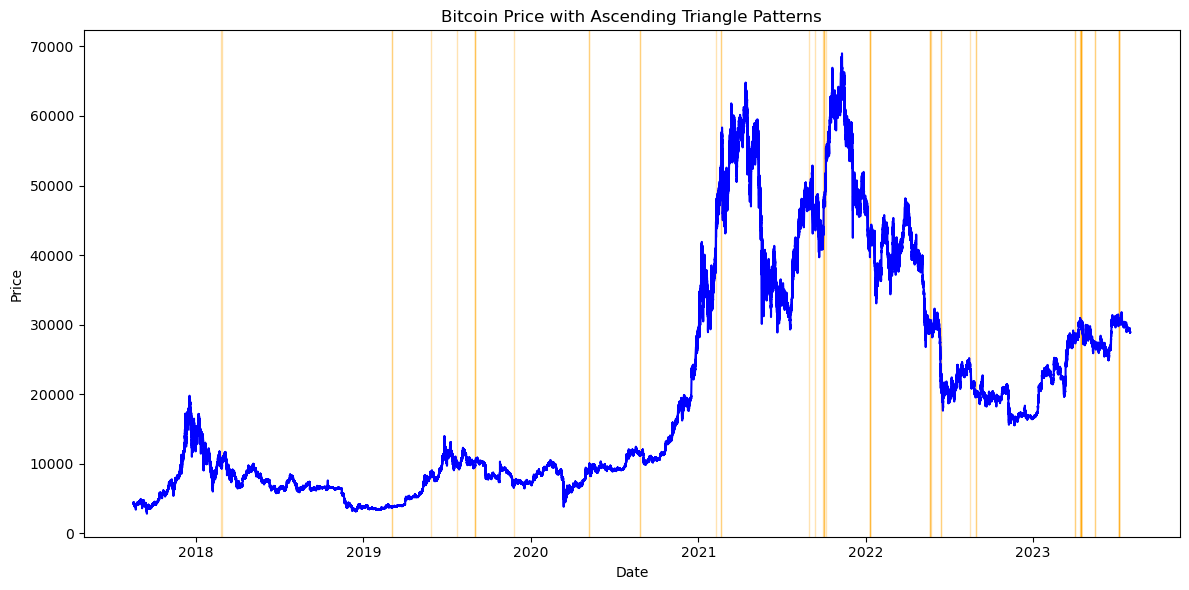

In [12]:
plt.figure(figsize=(12, 6))
plt.plot(data['timestamp'], data['close'], color='blue')

# Highlight detected patterns
for start, end in detected_patterns:
    plt.axvspan(start, end, color='orange', alpha=0.3)

# Set the title and labels
plt.title('Bitcoin Price with Ascending Triangle Patterns')
plt.xlabel('Date')
plt.ylabel('Price')

# Adjust layout to fit everything
plt.tight_layout()  
plt.show()


# CONCLUSION ---->
            This analysis successfully identified and visualized Ascending Triangle patterns in Bitcoin price data from 2017 to 2023. Key points include:

Data Handling ----> Loaded and preprocessed the dataset, ensuring proper formatting and chronological order.

Pattern Detection -----> Implemented an algorithm to detect Ascending Triangle patterns based on defined characteristics.

Visualization ----> Plotted the price data, highlighting the detected patterns for better understanding.

Real-Time Detection -----> Discussed strategies for detecting patterns in real-time using streaming data.

Trading Strategies -----> Suggested potential trading approaches based on the identified patterns.

Overall, this analysis provides valuable insights into Bitcoin price behavior, useful for traders and analysts. Future work could enhance detection methods and backtest trading strategies.